In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
# # # 设置负号显示及字体
from matplotlib import pylab

pylab.rcParams['font.sans-serif'] = ['SimHei']
pylab.rcParams['axes.unicode_minus'] = False

In [2]:
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.faker import Faker
from pyecharts.render import make_snapshot
# 使用 snapshot-selenium 渲染图片
# from snapshot_selenium import snapshot

import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

In [3]:
df = pd.read_csv('../二手房数据/data_all.csv', encoding='utf-8')
df

,单价（元/平方米）,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积（平方米）,户型结构,建筑类型,房屋朝向,建筑结构,装修情况,配备电梯,挂牌时间,交易权属,房屋用途
0,10200.0,成华,驷马桥,3室2厅1厨1卫,高楼层 (共6层),111.02,平层,板楼,南 北,砖混结构,毛坯,无,2021-02-21,拆迁安置房,普通住宅
1,20000.0,成华,猛追湾,4室1厅1厨2卫,高楼层 (共9层),144.42,平层,板塔结合,南,框架结构,精装,有,2021-11-21,商品房,普通住宅
2,35000.0,成华,驷马桥,7室4厅1厨4卫,低楼层 (共18层),271.09,跃层,板塔结合,南,钢混结构,简装,有,2021-12-03,商品房,普通住宅
3,11300.0,成华,猛追湾,3室2厅1厨2卫,中楼层 (共7层),113.41,平层,板楼,南,混合结构,简装,无,2021-12-02,商品房,普通住宅
4,18000.0,成华,驷马桥,3室2厅1厨2卫,中楼层 (共18层),123.70,平层,塔楼,南 北,钢混结构,毛坯,有,2021-12-14,商品房,普通住宅
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,12900.0,青羊,外金沙,2室2厅1厨2卫,中楼层 (共16层),87.22,平层,板楼,西南,框架结构,简装,有,2019-11-30,商品房,普通住宅
14834,6300.0,青羊,草市街,1室1厅1厨1卫,中楼层 (共28层),58.06,平层,板楼,东南,框架结构,精装,有,2020-12-02,商品房,普通住宅
14835,14800.0,青羊,草堂,2室2厅1厨1卫,高楼层 (共7层),80.60,平层,板楼,东南,砖混结构,精装,无,2020-06-21,已购公房,普通住宅
14836,26500.0,青羊,贝森,3室2厅1厨2卫,中楼层 (共8层),114.29,错层,板楼,南,混合结构,精装,无,2021-10-28,商品房,普通住宅


## 每个区单位面积分析

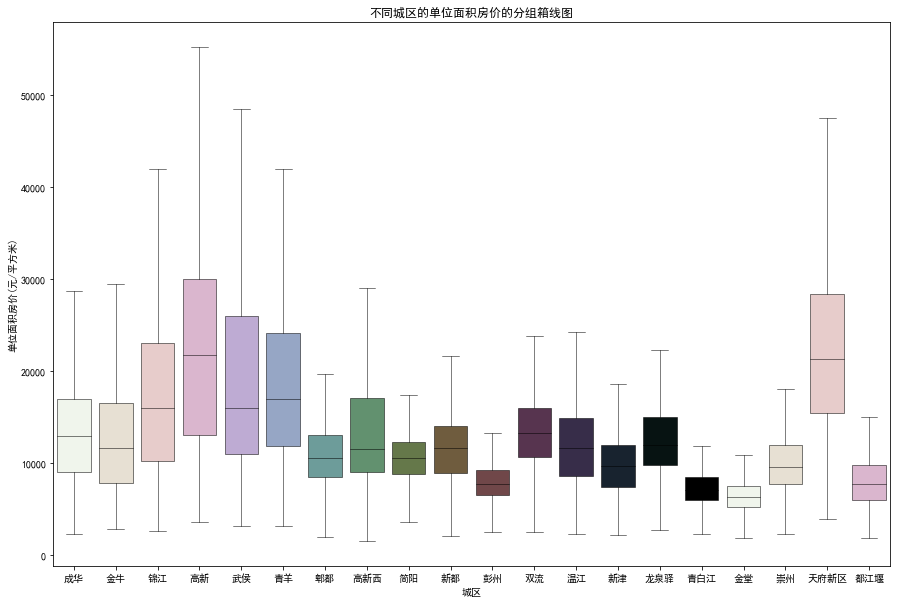

In [4]:
# # # 不同城区的单位面积房价（盒须图）
import seaborn as sns
df_temp1 = df[['房屋所属市辖区','单价（元/平方米）']].sort_values(by=['单价（元/平方米）'])
df_temp1['房屋所属市辖区'] = df_temp1['房屋所属市辖区'].astype('category')  # 标签排序
df_temp1['房屋所属市辖区'] = df_temp1['房屋所属市辖区'].cat.set_categories(['成华','金牛','锦江','高新','武侯','青羊','郫都','高新西','简阳','新都','彭州','双流','温江','新津','龙泉驿','青白江','金堂','崇州','天府新区','都江堰'])
plt.figure(figsize=(15,10))  # 设置画布大小
sns.boxplot(x='房屋所属市辖区',y='单价（元/平方米）',data=df_temp1,linewidth=0.5,palette=sns.cubehelix_palette(16,start=2, rot=2, dark=0, light=.95),showfliers=False)
plt.ylabel('单位面积房价(元/平方米)')
plt.xlabel('城区')
plt.title('不同城区的单位面积房价的分组箱线图')
plt.show()

## 单价、数量和总价的关系

In [5]:
dist = ['成华','金牛','锦江','高新','武侯','青羊','郫都','高新西','简阳','新都','彭州','双流','温江','新津','龙泉驿','青白江','金堂','崇州','天府新区','都江堰']

In [6]:
# 各区单价对比
x_data1 = []
y_data1 = []
price= round(df.groupby(by=['房屋所属市辖区'])['单价（元/平方米）'].mean()).to_dict()
for key,value in  price.items():
    x_data1.append(key)
    y_data1.append(value)
print(x_data1,y_data1)

['双流', '天府新区', '崇州', '彭州', '成华', '新津', '新都', '武侯', '温江', '简阳', '郫都', '都江堰', '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿'] [13728.0, 23268.0, 10684.0, 8097.0, 14035.0, 10487.0, 12115.0, 19769.0, 12630.0, 10699.0, 11451.0, 8428.0, 6534.0, 13140.0, 18719.0, 7465.0, 18956.0, 23663.0, 14192.0, 12941.0]


In [89]:
bar1 = (
    Bar({"theme": ThemeType.ESSOS})
    .add_xaxis(x_data1)
    .add_yaxis("单价",y_data1,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(255,255,255)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(205,92,92)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(205,92,92)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic',
                                              font_size=8))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个地区单价"),
        xaxis_opts=opts.AxisOpts(name="市辖区",axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(name="单价/元",axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=False),
#         xaxis_opts=opts.AxisOpts(name="1"),
    )
    
)
line = Line().add_xaxis(x_data1).add_yaxis("单价", y_data1,itemstyle_opts=opts.ItemStyleOpts(
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(65,105,225)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(65,105,225)'
                                             }])"""))).set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar1.overlap(line)

bar1.render_notebook()

In [8]:
df['总价']=df['单价（元/平方米）']*df['建筑面积（平方米）']
df

,单价（元/平方米）,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积（平方米）,户型结构,建筑类型,房屋朝向,建筑结构,装修情况,配备电梯,挂牌时间,交易权属,房屋用途,总价
0,10200.0,成华,驷马桥,3室2厅1厨1卫,高楼层 (共6层),111.02,平层,板楼,南 北,砖混结构,毛坯,无,2021-02-21,拆迁安置房,普通住宅,1132404.0
1,20000.0,成华,猛追湾,4室1厅1厨2卫,高楼层 (共9层),144.42,平层,板塔结合,南,框架结构,精装,有,2021-11-21,商品房,普通住宅,2888400.0
2,35000.0,成华,驷马桥,7室4厅1厨4卫,低楼层 (共18层),271.09,跃层,板塔结合,南,钢混结构,简装,有,2021-12-03,商品房,普通住宅,9488150.0
3,11300.0,成华,猛追湾,3室2厅1厨2卫,中楼层 (共7层),113.41,平层,板楼,南,混合结构,简装,无,2021-12-02,商品房,普通住宅,1281533.0
4,18000.0,成华,驷马桥,3室2厅1厨2卫,中楼层 (共18层),123.70,平层,塔楼,南 北,钢混结构,毛坯,有,2021-12-14,商品房,普通住宅,2226600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,12900.0,青羊,外金沙,2室2厅1厨2卫,中楼层 (共16层),87.22,平层,板楼,西南,框架结构,简装,有,2019-11-30,商品房,普通住宅,1125138.0
14834,6300.0,青羊,草市街,1室1厅1厨1卫,中楼层 (共28层),58.06,平层,板楼,东南,框架结构,精装,有,2020-12-02,商品房,普通住宅,365778.0
14835,14800.0,青羊,草堂,2室2厅1厨1卫,高楼层 (共7层),80.60,平层,板楼,东南,砖混结构,精装,无,2020-06-21,已购公房,普通住宅,1192880.0
14836,26500.0,青羊,贝森,3室2厅1厨2卫,中楼层 (共8层),114.29,错层,板楼,南,混合结构,精装,无,2021-10-28,商品房,普通住宅,3028685.0


In [9]:
# 各区总价对比
x_data2 = []
y_data2 = []
all_price= round(df.groupby(by=['房屋所属市辖区'])['总价'].mean()).to_dict()
for key,value in  all_price.items():
    x_data2.append(key)
    y_data2.append(value)
print(x_data2,y_data2)

['双流', '天府新区', '崇州', '彭州', '成华', '新津', '新都', '武侯', '温江', '简阳', '郫都', '都江堰', '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿'] [1564182.0, 3368529.0, 1459843.0, 950242.0, 1438827.0, 1400603.0, 1417077.0, 2735571.0, 1694322.0, 1258372.0, 1330912.0, 1055234.0, 736281.0, 1415102.0, 2001873.0, 841503.0, 1986508.0, 3058749.0, 1648222.0, 1565879.0]


In [90]:
bar2 = (
    Bar({"theme": ThemeType.ESSOS})
    .add_xaxis(x_data2)
    .add_yaxis("总价",y_data2,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(205,92,92)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(205,92,92)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic',
                                              font_size=8))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个地区总价"),
        xaxis_opts=opts.AxisOpts(name="市辖区",axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(name="总价/元",axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)
line = Line().add_xaxis(x_data2).add_yaxis("总价", y_data2,itemstyle_opts=opts.ItemStyleOpts(
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(65,105,225)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(65,105,225)'
                                             }])"""))).set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar2.overlap(line)

bar2.render_notebook()

In [11]:
# 各区房子数量对比
x_data3 = []
y_data3 = []
all_number= round(df.groupby(by=['房屋所属市辖区']).size()).to_dict()
for key,value in  all_number.items():
    x_data3.append(key)
    y_data3.append(value)
print(x_data3,y_data3)

['双流', '天府新区', '崇州', '彭州', '成华', '新津', '新都', '武侯', '温江', '简阳', '郫都', '都江堰', '金堂', '金牛', '锦江', '青白江', '青羊', '高新', '高新西', '龙泉驿'] [573, 457, 463, 582, 1300, 551, 641, 857, 573, 652, 701, 224, 498, 1574, 1399, 509, 813, 1283, 675, 513]


In [91]:
bar3 = (
    Bar({"theme": ThemeType.ESSOS})
    .add_xaxis(x_data3)
    .add_yaxis("数量",y_data3,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(205,92,92)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(205,92,92)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic',
                                              font_size=8))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个地区房子数量"),
        xaxis_opts=opts.AxisOpts(name="市辖区",axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(name="数量/个",axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)
line = Line().add_xaxis(x_data3).add_yaxis("数量", y_data3,itemstyle_opts=opts.ItemStyleOpts(
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(65,105,225)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(65,105,225)'
                                             }])"""))).set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar3.overlap(line)

bar3.render_notebook()

## 探究面积和总价

In [92]:
print(df["建筑面积（平方米）"],df["总价"])
c = (
    Scatter({"theme": ThemeType.ESSOS})
    .add_xaxis(df["建筑面积（平方米）"])
    .add_yaxis("", df["总价"])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="面积-房价"),
        visualmap_opts=opts.VisualMapOpts(max_=df['总价'].max()),
        xaxis_opts=opts.AxisOpts(name="面积/平方米",axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(name="房价/元",axislabel_opts=opts.LabelOpts(rotate=45)),
    )
)
c.render_notebook()

0        111.02
1        144.42
2        271.09
3        113.41
4        123.70
          ...  
14833     87.22
14834     58.06
14835     80.60
14836    114.29
14837     80.50
Name: 建筑面积（平方米）, Length: 14838, dtype: float64 0        1132404.0
1        2888400.0
2        9488150.0
3        1281533.0
4        2226600.0
           ...    
14833    1125138.0
14834     365778.0
14835    1192880.0
14836    3028685.0
14837    1593900.0
Name: 总价, Length: 14838, dtype: float64


## 户型和总价的联系

In [14]:
my_order = df.groupby(by=["房屋户型"])["总价"].mean().sort_values()
print(my_order)
x_data8 = my_order.index.to_list()
y_data8 = my_order.to_list()
print(x_data8,y_data8)

房屋户型
1室0厅1厨0卫     1.801920e+05
2室0厅1厨2卫     2.067840e+05
1室0厅0厨1卫     2.446103e+05
1室0厅1厨1卫     2.746660e+05
1室1厅0厨1卫     3.047065e+05
                 ...     
9室5厅1厨5卫     3.210872e+07
8室3厅1厨9卫     3.349531e+07
12室5厅3厨4卫    3.741200e+07
5室2厅1厨6卫     5.483614e+07
5室2厅1厨8卫     8.147900e+07
Name: 总价, Length: 141, dtype: float64
['1室0厅1厨0卫', '2室0厅1厨2卫', '1室0厅0厨1卫', '1室0厅1厨1卫', '1室1厅0厨1卫', '1室2厅1厨2卫', '1室1厅1厨0卫', '1室1厅1厨1卫', '0室0厅0厨0卫', '2室0厅1厨1卫', '2室1厅0厨1卫', '2室2厅1厨0卫', '2室0厅2厨2卫', '2室1厅1厨5卫', '2室0厅0厨0卫', '2室2厅2厨1卫', '1室2厅1厨1卫', '2室2厅2厨2卫', '3室2厅0厨2卫', '1室0厅0厨0卫', '1室1厅1厨2卫', '3室0厅1厨1卫', '2室3厅1厨1卫', '2室1厅1厨1卫', '1室1厅0厨2卫', '3室0厅0厨0卫', '2室2厅1厨1卫', '4室1厅2厨1卫', '3室2厅1厨1卫', '7室1厅1厨3卫', '3室1厅1厨1卫', '3室1厅0厨2卫', '4室0厅1厨1卫', '1室1厅0厨0卫', '3室1厅2厨1卫', '4室0厅2厨2卫', '3室2厅1厨0卫', '4室1厅2厨2卫', '6室4厅1厨2卫', '5室3厅1厨1卫', '5室1厅1厨1卫', '3室1厅0厨1卫', '2室2厅1厨2卫', '2室1厅1厨2卫', '4室3厅2厨2卫', '4室2厅1厨1卫', '3室2厅1厨2卫', '3室2厅2厨1卫', '4室1厅1厨1卫', '7室2厅2厨2卫', '3室1厅1厨2卫', '4室0厅0厨1卫', '3室3厅1厨1卫', '7室2厅1厨2卫', '3室1厅0厨0卫', '4室2厅2厨1卫'

In [93]:
bar4 = (
    Bar({"theme": ThemeType.ESSOS})
    .add_xaxis(x_data8)
    .add_yaxis("总价",y_data8,
               itemstyle_opts=opts.ItemStyleOpts(
        border_color='rgb(220,220,220)',
        color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1,
                                             [{
                                                 offset: 0,
                                                 color: 'rgb(165,42,42)'
                                             }, {
                                                 offset: 1,
                                                 color: 'rgb(165,42,42)'
                                             }])""")))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,
                                               position='top',
                                               font_style='italic',
                                              font_size=8))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各个户型的平均总价"),
        xaxis_opts=opts.AxisOpts(name="房型",axislabel_opts=opts.LabelOpts(rotate=45)),
        yaxis_opts=opts.AxisOpts(name="房价/元",axislabel_opts=opts.LabelOpts(rotate=45)),
        legend_opts=opts.LegendOpts(is_show=False),
        datazoom_opts=[opts.DataZoomOpts()]
    )
)

bar4.render_notebook()

## 探究朝向和总价的关系

In [17]:
linex_data1 = ["北","西北","西","西南","南","东南","东","东北"]
liney_data1 = []
my_order = df.groupby(by=["房屋朝向"])["总价"].median().sort_values(ascending=False).to_dict()
print(my_order)
for key in  linex_data1:
    liney_data1.append(my_order[key])

print(liney_data1)

{'南 西 东': 20579265.0, '西北 西': 9519021.5, '西南 西 西北 北': 7725410.0, '西北 北 东北': 7408470.0, '南 东南 西南': 5213600.0, '南 西 北': 5093256.0, '北 西北': 4894065.0, '东 南 北': 3950223.0, '东南 东 南': 3884160.0, '东南 西南 西': 3034720.0, '西 北': 2890159.9999999995, '东南 南 西南 西': 2831843.3, '南 东': 2823322.0, '东北 北 南': 2591295.0, '东南 南 西南': 2526510.0, '南 北 东北': 2438060.0, '东北 东': 2241812.0, '南 西北': 2032580.0000000002, '东 南 西 北': 1860768.0, '西 西南': 1854190.0, '东北 西南': 1788286.0, '西北 西 北': 1709400.0, '西南 东北': 1707369.0, '北 东': 1701370.0, '东 西北': 1699822.7000000002, '西南 东南': 1684576.0000000002, '东 西': 1544975.0, '东 南': 1521354.25, '东南 西北': 1511863.0, '西南 西北': 1401550.0, '北 东南': 1400194.0, '西 东': 1370618.8, '东北 南': 1367197.5, '南 东北': 1349700.0, '东 西南 西': 1347940.0, '东 东南 南': 1339000.0, '南 北': 1321697.0, '北': 1316259.0, '东 东南 南 西南': 1307127.5, '西南 南': 1298024.0, '西 西北': 1247835.0, '东北 东南': 1240482.0, '南 西南 东北': 1232250.0, '南 西': 1229701.0, '东南 西南 西北': 1183320.0, '东北': 1170489.0, '西北': 1156538.0, '西': 1152170.0, '西南': 114

### 去除多余标签

In [18]:
df['房屋朝向'] = [i.split(' ')[0] for i in df['房屋朝向']]
df['房屋朝向'].value_counts()

东南    4583
南     4553
东     1769
西南    1432
北      729
西北     622
西      589
东北     561
Name: 房屋朝向, dtype: int64

In [66]:
linex_data1 = ["北","西北","西","西南","南","东南","东","东北"]
liney_data1 = []
my_order = df.groupby(by=["房屋朝向"])["总价"].mean().sort_values(ascending=False).to_dict()
print(my_order)
for key in  linex_data1:
    liney_data1.append(my_order[key])

liney_data2=np.array(liney_data1)
liney_data2 =np.round(liney_data2,2)
liney_data1=liney_data2.tolist()
print(liney_data1)

{'南': 1916450.3550625953, '北': 1826058.1954732507, '西南': 1742329.923812849, '西北': 1732867.889389068, '东北': 1702977.4267379679, '东南': 1623379.6458215155, '东': 1617126.6247597504, '西': 1549731.8025466893}
[1826058.2, 1732867.89, 1549731.8, 1742329.92, 1916450.36, 1623379.65, 1617126.62, 1702977.43]


In [67]:
c1 = (
    Radar({"theme": ThemeType.ESSOS})
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="北", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="西北", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="西", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="西南", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="南", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="东南", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="东", max_=2000000,color="black"),
            opts.RadarIndicatorItem(name="东北", max_=2000000,color="black"),
            
        ]
    )
    .add("总价", [liney_data1],linestyle_opts=opts.LineStyleOpts(color="#CD0000"),areastyle_opts=opts.AreaStyleOpts(opacity=0.5,color="#CD0000"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True,color="black"))
    .set_global_opts(
        legend_opts=opts.LegendOpts(selected_mode="single"),
        title_opts=opts.TitleOpts(title="朝向和总价的关系"),
    )
)

c1.render_notebook()